# 分类算法的评估

### 分类准确度的问题
例如癌症的预测率   要是我们预测每个人没有癌症 那么准确度也是很高的

## 对于二分类问题

## 混淆矩阵

### 行代表真实值
### 列代表预测值

 ###  行/列0    1
### 0       TN   FP
### 1       FN   TP     N-Negative P-positive

## 精准率和召回率

In [1]:
###  行/列  0      1
### 0     9978   12
### 1      2      8     N-Negative P-positive

In [2]:
# 精准率： precision = TP/(TP+FP)
# 精准率  = 8/(8+12) = 40%

In [3]:
#召回率    recall = TP/(TP+FN)
#召回率   = 8/（8+2） = 80%    

In [4]:
# 例如 ： 预测所有人都是健康的
###  行/列  0      1
### 0     9990     0
### 1      10      0     
#    准确率 = 99.9%
#    精准率 = 0/(0+0) 无意义
#    召回率 = 0/0+0) = 0

In [5]:
import numpy as np
from sklearn import datasets

In [12]:
# 手写数据集
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=666)

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9755555555555555

In [16]:
y_log_predict = log_reg.predict(X_test)

In [18]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true==0) & (y_predict==0))

TN(y_test, y_log_predict)

403

In [19]:
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true==0) & (y_predict==1))

FP(y_test, y_log_predict)

2

In [21]:
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true==1) & (y_predict==0))

FN(y_test, y_log_predict)

9

In [22]:
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true==1) & (y_predict==1))

TP(y_test, y_log_predict)

36

### 求混淆矩阵

In [26]:
def confusion_mattix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict),FP(y_true, y_predict)],
        [FN(y_true, y_predict),TP(y_true, y_predict)]
    ]
    )
confusion_mattix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

### 计算精准率和召回率

In [28]:
def precision_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    try:
        return tp/(tp+fp)
    except:
        return 0.0
precision_score(y_test, y_log_predict)

0.9473684210526315

In [30]:
def recall_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp/(tp+fn)
    except:
        return 0.0
recall_score(y_test, y_log_predict)

0.8

## scikit-learn中的混淆矩阵,精准率和召回率

In [31]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [32]:
from sklearn.metrics import precision_score

precision_score(y_test, y_log_predict)

0.9473684210526315

In [33]:
from sklearn.metrics import recall_score

recall_score(y_test, y_log_predict)

0.8

### 有时候我们注重精准率，如股票预测(升降)（损失小）
### 有时候我们注重召回率，如病人诊断(FP错误，可以让病人去确诊，不漏掉任何病人)

# F1 score
二者都兼顾: F1 score

F1 score 是 precision 和 recall 的调和平均值

## 1/F1 = 1/2(1/precision+1/recall)
一个底 F1也底  只有二者高F1才高

In [39]:
# F1 = 2*precision*recall/(precision+recall）

In [48]:
def f1_score(precision,recall):
    try:
        return 2*precision*recall/(precision+recall)
    except:
        0.0

In [41]:
precision = 0.5
recall = 0.5
f1_score(precision,recall)

0.5

In [42]:
precision = 0.1
recall = 0.9
f1_score(precision,recall)

0.18000000000000002

In [43]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=666)

In [45]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9755555555555555

In [46]:
y_predict = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

In [53]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [54]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict)

0.8

In [55]:
from sklearn.metrics import f1_score

f1_score(y_test,y_predict)

0.8674698795180723

In [56]:
## 解释，数据是有偏的

# Precision-Recall 的平衡

In [57]:
# 决策边界 threashold

<img style="float: right;" src="QQ截图20180904213845.png" width="100%">

In [58]:
log_reg.decision_function(X_test)

array([-22.05700117, -33.02940957, -16.21334087, -80.3791447 ,
       -48.25125396, -24.54005629, -44.39168773, -25.04292757,
        -0.97829292, -19.7174399 , -66.25139191, -51.09600903,
       -31.49348767, -46.05335761, -38.67875653, -29.80471251,
       -37.58849546, -82.57569732, -37.81903096, -11.01165509,
        -9.17439784, -85.13004331, -16.71617974, -46.23725224,
        -5.32992784, -47.91762441, -11.66729524, -39.1960157 ,
       -25.25293243, -14.3664722 , -16.99783066, -28.91904826,
       -34.33940562, -29.47603768,  -7.85812845,  -3.82094912,
       -24.08161558, -22.16362592, -33.61218699, -23.14023293,
       -26.9180406 , -62.3893701 , -38.85690022, -66.77259733,
       -20.14482853, -17.47886658, -18.06799819, -22.22224569,
       -29.62302848, -19.73171824,   1.49552053,   8.32079827,
       -36.29307324, -42.50732725, -25.90460192, -34.98959422,
        -8.42010631, -50.04725431, -51.48208247,  19.88958588,
        -8.91888462, -31.99343636, -11.66099193,  -0.47

In [59]:
log_reg.decision_function(X_test)[:10]

array([-22.05700117, -33.02940957, -16.21334087, -80.3791447 ,
       -48.25125396, -24.54005629, -44.39168773, -25.04292757,
        -0.97829292, -19.7174399 ])

### 决策score值，默认以0作为分类标准

In [60]:
decision_scores = log_reg.decision_function(X_test)

In [62]:
np.min(decision_scores)

-85.68608522646575

In [64]:
np.max(decision_scores)

19.8895858799022

### 把阈值从0调到5
### 调节精准率和召回率

In [66]:
y_predict_2 = np.array(decision_scores >= 5,dtype='int')

In [68]:
confusion_matrix(y_test,y_predict_2)

array([[404,   1],
       [ 21,  24]], dtype=int64)

In [69]:
precision_score(y_test,y_predict_2)

0.96

In [70]:
recall_score(y_test,y_predict_2)

0.5333333333333333

In [71]:
precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores),0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

In [72]:
import matplotlib.pyplot as plt

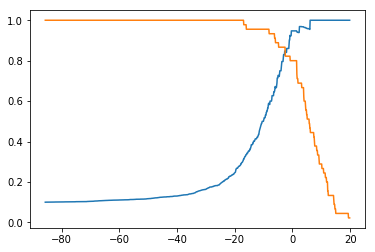

In [73]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

### Precision-Recall曲线

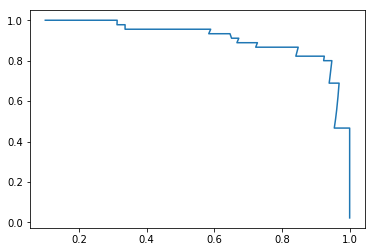

In [75]:
plt.plot(precisions, recalls)
plt.show()

### scikit-learn 中的Precision-Recall曲线

In [78]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [79]:
precisions.shape

(145,)

In [80]:
recalls.shape

(145,)

In [81]:
thresholds.shape

(144,)

### 最后的精准率和召回率分别为1和0，没有对应的thresholds

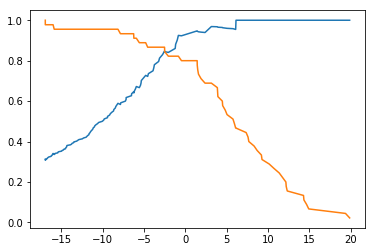

In [83]:
# sklearn 自动找到它认为的重要的部分曲线
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

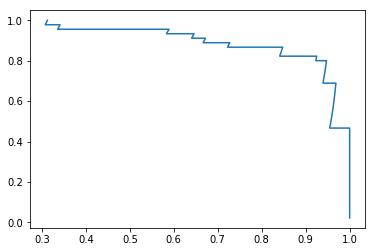

In [84]:
plt.plot(precisions[:-1], recalls[:-1])
plt.show()

###  我们认为P-R曲线覆盖的面积越大，模型越好
<img style="float: right;" src="QQ截图20180904220451.png" width="100%">

# ROC曲线

Receiver Operation Characteristic Curve

描述TPR和FPR之间的关系

<img style="float: right;" src="QQ截图20180904220810.png" width="100%">

<img style="float: right;" src="QQ截图20180904221117.png" width="100%">

#### 随着thresholds变化  TPR和FPR的变化

<img style="float: right;" src="QQ截图20180904221448.png" width="100%">

<img style="float: right;" src="QQ截图20180904221448.png" width="100%">

In [90]:
def TPR(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp / (tp+fn)
    except:
        return 0.

In [96]:
def FPR(y_true, y_predict):
    fp = FP(y_true, y_predict)
    tn = TN(y_true, y_predict)
    try:
        return fp / (fp+tn)
    except:
        return 0.

In [97]:
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

fprs = []
tprs = []
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(y_test,y_predict))
    tprs.append(TPR(y_test,y_predict))

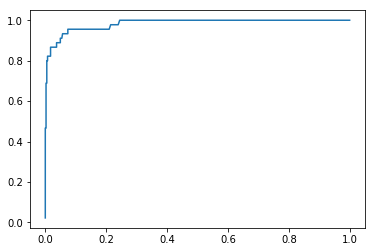

In [98]:
plt.plot(fprs, tprs)
plt.show()

## scikit-learn 中的 ROC

In [99]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

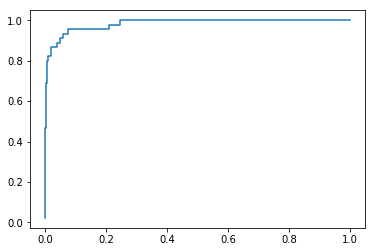

In [100]:
plt.plot(fprs,tprs)
plt.show()

### 求roc面积

In [103]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)
## 对有偏数据不那么敏感

0.9830452674897119

## ROC比较两个模型的优劣.认为面积大的模型更好

# 以上是二分类问题

# 多分类问题中的混淆矩阵

In [104]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=666)

In [109]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test, y_test)

0.93115438108484

In [110]:
y_predict = log_reg.predict(X_test)

In [112]:
from sklearn.metrics import precision_score

precision_score(y_test,y_predict,average='micro')

0.93115438108484

In [114]:
# 行是真实值
# 列是预测值
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[147,   0,   1,   0,   0,   1,   0,   0,   0,   0],
       [  0, 123,   1,   2,   0,   0,   0,   3,   4,  10],
       [  0,   0, 134,   1,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 138,   0,   5,   0,   1,   5,   0],
       [  2,   5,   0,   0, 139,   0,   0,   3,   0,   1],
       [  1,   3,   1,   0,   0, 146,   0,   0,   1,   0],
       [  0,   2,   0,   0,   0,   1, 131,   0,   2,   0],
       [  0,   0,   0,   1,   0,   0,   0, 132,   1,   2],
       [  1,   9,   2,   3,   2,   4,   0,   0, 115,   4],
       [  0,   1,   0,   5,   0,   3,   0,   2,   2, 134]], dtype=int64)

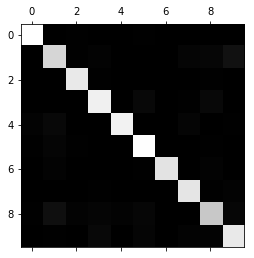

In [115]:
cfm = confusion_matrix(y_test,y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()  #灰度矩阵

In [116]:
row_sums = np.sum(cfm, axis=1) # 行和
err_matrix = cfm / row_sums    # 百分比
np.fill_diagonal(err_matrix, 0) #对角线填充为0

In [117]:
err_matrix # 犯错误的百分比

array([[0.        , 0.        , 0.00735294, 0.        , 0.        ,
        0.00657895, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00735294, 0.01342282, 0.        ,
        0.        , 0.        , 0.02205882, 0.02857143, 0.06802721],
       [0.        , 0.        , 0.        , 0.00671141, 0.        ,
        0.        , 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03289474, 0.        , 0.00735294, 0.03571429, 0.        ],
       [0.01342282, 0.03496503, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02205882, 0.        , 0.00680272],
       [0.00671141, 0.02097902, 0.00735294, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.01398601, 0.        , 0.        , 0.        ,
        0.00657895, 0.        , 0.        , 0.01428571, 0.        ],
       [0.        , 0.        , 0.       

### 可以很清晰的看到算法犯的错误

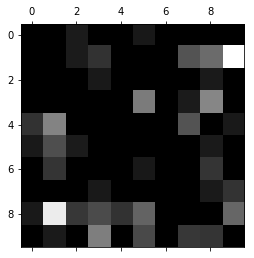

In [120]:
plt.matshow(err_matrix, cmap=plt.cm.gray)
plt.show()